In [1]:
# Base packages
import os
import numpy as np
import pandas as pd
import json

# Web scraping
from bs4 import BeautifulSoup
import requests

# Misc
from tqdm import tqdm
from datetime import datetime
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')

# Web scraping and data cleaning

## Data source: Grantham Institute Climate Laws data


<img src="logo-gri.png" width=200>

After investigating https://www.climate-laws.org/ with Edge's Developer Console, I've found out that the website's React app gets its JSON data from this link https://www.climate-laws.org/legislation_and_policies.json?offset=[offset]. This will allow me to batch request the data straight from the website's back-end, instead of scraping and cleaning static HTML files.

By: Viet Hung Ha and Anne-Laure Rajaona

In [2]:
# Function to request data
def request_climate_laws_data(offset_batch=np.arange(10, 2100, 10)):
    """
    Get online Climate Laws data from climate-laws.org, and process it into DataFrame
    """
    climate_laws_df = pd.DataFrame()
    for offset in tqdm(offset_batch):
        climate_laws_url = f"https://www.climate-laws.org/legislation_and_policies.json?offset={offset}"
        climate_laws_data = requests.get(climate_laws_url)
        climate_laws_df = climate_laws_df.append(climate_laws_data.json()["items"])
    return climate_laws_df.reset_index()

In [3]:
climate_laws_df = request_climate_laws_data(np.arange(10, 2100, 10))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [00:51<00:00,  4.09it/s]


In [4]:
# Exploring dataset
print(f"Data shape: {climate_laws_df.shape}")
print(f"Columns:\n{climate_laws_df.columns}")
climate_laws_df.head()

Data shape: (2090, 24)
Columns:
Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path'],
      dtype='object')


,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,parent_id,tsv,date,link,short_description,geography,date_passed,last_change,legislation_type_humanize,geography_path
0,0,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,NaN,'1':28B '10':126B '13th':222B '2':65B '2003':1...,2020-12-09,"<a href=""/geographies/mexico/laws/general-law-...",This law replaces the 2003 general law for sus...,"{'id': 114, 'geography_type': 'national', 'iso...",2018,"December, 2020",Legislative,/geographies/mexico
1,1,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,NaN,'-2020':94B '4259':3A '6.2':81B '6.4':83B '6.8...,2020-11-27,"<a href=""/geographies/india/policies/notificat...",This document from the Ministry of Environment...,"{'id': 78, 'geography_type': 'national', 'iso'...",2020,None,Executive,/geographies/india
2,2,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,NaN,'-12':731B '-20':205B '-2012':386B '-2020':417...,2020-11-25,"<a href=""/geographies/switzerland/laws/co2-act...","On November 25, 2020, the Federal Council adop...","{'id': 174, 'geography_type': 'national', 'iso...",2013,"November, 2020",Legislative,/geographies/switzerland
3,3,9739,An EU Strategy to harness the potential of off...,<div>This communication from the Commission es...,None,an-eu-strategy-to-harness-the-potential-of-off...,59,2020-12-04T17:10:20.086Z,2021-02-27T13:44:49.554Z,published,...,NaN,'-400':75B '2050':40B '300':74B 'achiev':72B '...,2020-11-19,"<a href=""/geographies/european-union/policies/...",This communication from the Commission establi...,"{'id': 59, 'geography_type': 'supranational', ...",2020,None,Executive,/geographies/european-union
4,4,9734,Royal Decree 960/2020 regulating the economic ...,<div>This document sets the remuneration frame...,None,royal-decree-960-2020-regulating-the-economic-...,168,2020-11-16T15:58:40.307Z,2020-11-16T16:00:51.183Z,published,...,9468,'960/2020':3A 'base':43B 'call':31B 'de':40B '...,2020-11-03,"<a href=""/geographies/spain/policies/royal-dec...",This document sets the remuneration framework ...,"{'id': 168, 'geography_type': 'national', 'iso...",2020,None,Executive,/geographies/spain


In [5]:
# Saving data to use later, instead of requesting from server
os.makedirs("./climate_laws_data", exist_ok=True)
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")

climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data.xlsx", index=False)

### EDA and data cleaning

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

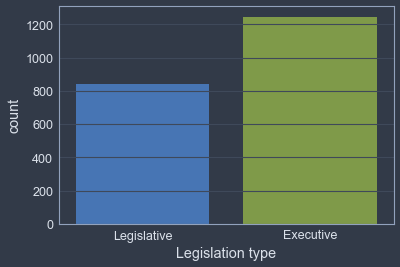

In [7]:
# Types of legislation
legislation_type_plot = sns.countplot(x="legislation_type_humanize", data=climate_laws_df)
plt.xlabel("Legislation type")
plt.show()

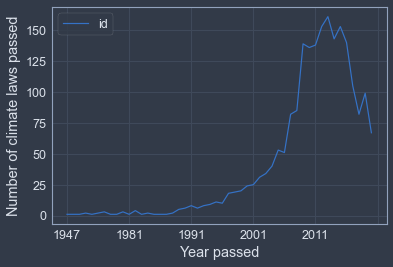

Year with maximum number of laws passed: 


,date_passed,id
42,2013,161


In [8]:
# Date passed - seeing the distribution of pass date of the laws
date_passed_count_df = pd.DataFrame(pd.pivot_table(values="id", index="date_passed", aggfunc='count', data=climate_laws_df).to_records())
date_passed_count_df.plot(x="date_passed", ylabel="Number of climate laws passed", xlabel="Year passed")
plt.show()

print("Year with maximum number of laws passed: ")
date_passed_count_df[date_passed_count_df["id"] == date_passed_count_df["id"].max()]

#### Observations:
The figure above is interesting. 

The number of laws passed started to skyrocket around 1999 and continue to rise until 2013, after which we see a marked decline.

Additionally, we see that 2013 has the highest number of climate laws passed, it will be interesting to see which countries contribute to these? As well as which topics (topic modelling will come later)

#### Update:

This peak coincides with the drafting and signing of the **Paris Agreement** in 2015 and 2016.

## Provisional research question:

"What factors explain the presence of climate laws in a given year?"

In [9]:
# Extracting country name from geography column
def extract_country_name(df):
    return df["geography"]["name"]
climate_laws_df.loc[:, "country_name"] = climate_laws_df.apply(lambda x: extract_country_name(x), axis=1)

In [10]:
# Investigating which countries pass to the Climate laws in 2013
def country_laws_year_passed(year=2013):
    count_df = pd.DataFrame(pd.pivot_table(values="id", index="country_name", aggfunc="count",
                                          data=climate_laws_df[climate_laws_df["date_passed"]==str(year)]).to_records())
    return count_df

In [11]:
# Seeing the Top five countries passing highest number of climate laws in 2013
country_laws_year_passed(year=2013).sort_values("id", ascending=False).head()

,country_name,id
81,Spain,8
31,European Union,5
15,Burkina Faso,5
12,Brazil,5
18,Chile,4


In [12]:
# I've found it a bit surprising to see Burkina Faso on this list, let's investigate which laws were passed
# Helper function
def print_laws_title_country_year(country, year):
    print(f"// {country} - {str(year)}: //")
    for item in climate_laws_df[(climate_laws_df["country_name"]==country) & 
                    (climate_laws_df["date_passed"]==str(year))]["title"]:
        print(item)

print_laws_title_country_year("Burkina Faso", 2013)

// Burkina Faso - 2013: //
National multi-risk plan for disaster preparedness and response
Decree no. 2013-325 (establishing the mission of a national entity responding to climate change)
Law no. 006-2013 (on the Code for the Environment)
Decree no. 2013-151 (on the National Council for the Environment and Sustainable Development)
Law of finance 2013 relative to the deletion of customs charges on equipments and material of solar energy


In [13]:
# Finding out which country/region passes the maximum number of climate laws within a year
_ = pd.DataFrame(pd.pivot_table(values="id", index=["date_passed", "country_name"], aggfunc="count", data=climate_laws_df))

# Print out result
print(f"Maximum number of climate laws passed by country/region in a year:\n{_.iloc[_.id.argmax(), :]}")

Maximum number of climate laws passed by country/region in a year:
id    9
Name: (2009, European Union), dtype: int64


9 climate laws were passed by the European Union in 2009. Let's see what they are 

In [14]:
# 9 laws passed by the EU in 2009
for law in climate_laws_df[(climate_laws_df["date_passed"]=="2009") & (climate_laws_df["country_name"]=="European Union")]["title"]:
    print(law, '\n')

Clean and energy-efficient road transport vehicles (Directive 2009/33/EC on the promotion of clean road transport vehicles in support of low-emission mobility) 

Revision of the EU Emission Trading System (EU ETS) (Directive 2009/29/EC amending Directive 2003/87/EC so as to improve and extend the greenhouse gas emission allowance trading scheme of the Community) 

Fuel Quality (Directives 2009/30/EC and 2015/1513 amending Directive 98/70/EC as regards the specification of petrol, diesel and gas-oil and introducing a mechanism to monitor and reduce GHG emissions and amending Council Directive 1999/32/EC as regards the specification of fuel used by inland waterway vessels and repealing Directive 93/12/EEC) 

Emission performance standards for new passenger cars (Regulation (EC) No. 443/2009 setting emission performance standards for new passenger cars as part of the Community's integrated approach to reduce CO2 emissions from light-duty vehicles) 

2020 Climate and Energy Package (contai

#### Observation:

Upon further observations, I noticed that the "geography" column contains a lot of useful information, such as the country's World Bank Income Group, Climate Risk index, Percent of Global Emissions, etc. It will be very useful to bring these information into the columns of the main DataFrame.

In [15]:
# Enriching data with more useful information from "geography column"
def percent_global_emissions(df):
    return df["geography"]["percent_global_emissions"]

def climate_risk_index(df):
    return df["geography"]["climate_risk_index"]

def wb_income_group(df):
    return df["geography"]["wb_income_group"]

def eu_member_ind(df):
    return df["geography"]["eu_member"]

def visibility_status(df):
    return df["geography"]["visibility_status"]

def law_discarded_at(df):
    return df["geography"]["discarded_at"]

def federal_ind(df):
    return df["geography"]["federal"]

def legislative_process(df):
    return df["geography"]["legislative_process"]

# Adding columns
for func, name in zip([percent_global_emissions, climate_risk_index, wb_income_group, eu_member_ind, visibility_status, law_discarded_at, federal_ind, legislative_process],
                     ["percent_global_emissions", "climate_risk_index", "wb_income_group", "eu_member_ind", "visibility_status", "law_discarded_at", "federal_ind", "legislative_process"]):
    climate_laws_df.loc[:, name] = climate_laws_df.apply(lambda x: func(x), axis=1)

In [16]:
# Seeing number of laws passed per WB Income Group
pd.DataFrame(pd.pivot_table(values="id", index="wb_income_group", aggfunc="count", data=climate_laws_df.dropna(subset=["wb_income_group"])).to_records())

,wb_income_group,id
0,,4
1,High income,735
2,Low income,237
3,Lower middle income,501
4,Upper middle income,528


**Observation**

Middle income countries are most active at issuing climate laws

In [17]:
# Saving this expanded dataset
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data_expanded.xlsx", index=False)

#### Exploring this expanded dataset 

In [18]:
climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,legislation_type_humanize,geography_path,country_name,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind,law_discarded_at,federal_ind,legislative_process
0,0,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,Legislative,/geographies/mexico,Mexico,1.45,61.83,Upper middle income,False,None,True,<div>The United Mexican States (Mexico) has a ...
1,1,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,Executive,/geographies/india,India,6.81,38.67,Lower middle income,False,None,True,"<p style=""text-align: justify;"">The Indian par..."
2,2,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,Legislative,/geographies/switzerland,Switzerland,0.1,52.33,High income,False,None,True,"<p style=""text-align: justify;"">Switzerland is..."
3,3,9739,An EU Strategy to harness the potential of off...,<div>This communication from the Commission es...,None,an-eu-strategy-to-harness-the-potential-of-off...,59,2020-12-04T17:10:20.086Z,2021-02-27T13:44:49.554Z,published,...,Executive,/geographies/european-union,European Union,None,None,None,False,None,True,"<p style=""text-align: justify;"">The legislativ..."
4,4,9734,Royal Decree 960/2020 regulating the economic ...,<div>This document sets the remuneration frame...,None,royal-decree-960-2020-regulating-the-economic-...,168,2020-11-16T15:58:40.307Z,2020-11-16T16:00:51.183Z,published,...,Executive,/geographies/spain,Spain,0.6,47.33,High income,True,None,False,"<p style=""text-align: justify;"">Spain is a Par..."


In [19]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process'],
      dtype='object')

In [20]:
climate_laws_df.head()

,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,legislation_type_humanize,geography_path,country_name,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind,law_discarded_at,federal_ind,legislative_process
0,0,8713,General Law for Sustainable Forest Development,"<div>This law replaces the <a href=""http://www...",None,general-law-for-sustainable-forest-development,114,2019-12-08T17:46:02.526Z,2021-02-17T17:53:37.188Z,published,...,Legislative,/geographies/mexico,Mexico,1.45,61.83,Upper middle income,False,None,True,<div>The United Mexican States (Mexico) has a ...
1,1,9741,Notification S.O. 4259(E) creating the Apex Co...,<div>This document from the Ministry of Enviro...,None,notification-s-o-4259-e-creating-the-apex-comm...,78,2020-12-04T18:07:29.406Z,2020-12-04T18:13:52.925Z,published,...,Executive,/geographies/india,India,6.81,38.67,Lower middle income,False,None,True,"<p style=""text-align: justify;"">The Indian par..."
2,2,1687,"CO2 Act (Act 641.71, fully revised version)","<div>On November 25, 2020, the Federal Council...",None,co2-act-act-641-71-fully-revised-version,174,2019-12-08T17:46:22.795Z,2020-12-04T15:29:03.388Z,published,...,Legislative,/geographies/switzerland,Switzerland,0.1,52.33,High income,False,None,True,"<p style=""text-align: justify;"">Switzerland is..."
3,3,9739,An EU Strategy to harness the potential of off...,<div>This communication from the Commission es...,None,an-eu-strategy-to-harness-the-potential-of-off...,59,2020-12-04T17:10:20.086Z,2021-02-27T13:44:49.554Z,published,...,Executive,/geographies/european-union,European Union,None,None,None,False,None,True,"<p style=""text-align: justify;"">The legislativ..."
4,4,9734,Royal Decree 960/2020 regulating the economic ...,<div>This document sets the remuneration frame...,None,royal-decree-960-2020-regulating-the-economic-...,168,2020-11-16T15:58:40.307Z,2020-11-16T16:00:51.183Z,published,...,Executive,/geographies/spain,Spain,0.6,47.33,High income,True,None,False,"<p style=""text-align: justify;"">Spain is a Par..."


In [21]:
pd.DataFrame(pd.pivot_table(values="id", index=["country_name"], aggfunc="count", data=climate_laws_df).to_records())

,country_name,id
0,Afghanistan,14
1,Albania,3
2,Algeria,13
3,Andorra,8
4,Angola,21
...,...,...
193,Venezuela,4
194,Vietnam,26
195,Yemen,6
196,Zambia,17


### Cleaning the core description content

The main description feature contains HTML tags and other items that needs to be cleaned

In [22]:
# Import relevant libraries
import re

In [23]:
# Function to clean up description
def clean_description(df, col="description"):
    # Convert to string
    df[col] = str(df[col])
    # Remove html tags and React non-breaking space characters i.e. &nbsp
    df[col] = re.sub(r"(&nbsp;)|(<([^>]+)>)", " ", df[col])
    # Misc - converting markup ampersand to normal ampersand
    df[col] = re.sub(r"(&amp)", "&", df[col])
    # Convert any double space into single space
    df[col] = df[col].replace("  ", " ")
    # Remove 'nan'
    df[col] = df[col].replace("nan", "")
    # Remove 'None'
    df[col] = df[col].replace("None", "")
    # Trimming leading or trailing space
    df[col] = df[col].strip()
    return df[col]

# Applying the function
climate_laws_df.loc[:, "clean_description"] = climate_laws_df.apply(lambda x: clean_description(x), axis=1)

In [24]:
# Cleaning legislative process column
climate_laws_df.loc[:, "clean_legislative_process"] = climate_laws_df.apply(
    lambda x:clean_description(x, "legislative_process"), axis=1)

In [25]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process', 'clean_description',
       'clean_legislative_process'],
      dtype='object')

In [26]:
climate_laws_df["clean_legislative_process"][19]

'Spain is a Parliamentary Monarchy. The King is the Head of State and exercises the functions attributed in the Constitution and the laws. The Constitution defines Spain as a unitary State, but guarantees autonomy for nationalities and regions. \n The Spanish Parliament is divided in two chambers: the Congress of Deputies with popular representation, and the Senate with territorial representation. The last regular parliamentary election was held in December 2015 but as no party gained the majority, the Parliament was dissolved and new election held in June 2016, the next is expected for 2020. Both Chambers convene in Plenary Sessions and in Commissions. Assemblies of the Autonomous Communities may ask the government to adopt a bill or send an act of proposal to the Board of the Congress. Popular initiatives require at least 500,000 signatures and cannot introduce legislation dealing with issues reserved to Organic Laws or regarding taxes, international affairs and the prerogative of pa

##### Showing an example of a cleaned description 

In [27]:
# An example of before and after
print(climate_laws_df["title"][22])
print('\n')
print(climate_laws_df["description"][22])
print('\n')
print(climate_laws_df["clean_description"][22])

Ireland's National Energy and Climate Plan


<div>The National Energy and Climate (ENCP) Plan is a ten-year integrated document <a href="https://ec.europa.eu/energy/topics/energy-strategy/national-energy-climate-plans_en">mandated by the European Union</a> to each of its member states in order for the EU to meet its overall greenhouse gases emissions targets.&nbsp; The Energy and Climate Plan addresses all five dimensions of the EU Energy Union: decarbonisation, energy efficiency, energy security, internal energy markets and research, innovation and competitiveness. &nbsp;<br><br>The plan establishes key measures to address the five dimensions of the EU Energy Union :&nbsp;<br><br>1) Decarbonisation : to reduce emissions from sectors outside the EU's Emissions Trading System, carbon pricing to create behavioural change and avoid locking in carbon intensive technologies, eliminate non-recyclable plastic and impose higher fees on the production of materials which are difficult to recycle

In [28]:
# Output this DataFrame to Excel
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")
climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data_cleaned.xlsx", index=False)

### Clustering description and legislative process --> Giving some structure to the text data 

In [29]:
# Feature extraction and clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

# General NLP libraries
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import string

# Spell correction
from autocorrect import Speller

# Global nlp vars
stop_words = stopwords.words("english")
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

**Observations:**

There are certain words that can be filtered out in the preprocessing steps, including: **law, legal, environment, environmental, action, act, decree, directive**

Since this is a legal context, these words may not be very useful at differentiating and grouping topics together

In [42]:
# Loading in stop words
del_words_general = []
with open('./misc/del_words_general.txt', 'r', encoding="utf8") as file:
    for line in file:
        word = line.split('\n')[0]
        word = word.lower()
        del_words_general.append(word)
file.close()

print('Before: ', del_words_general)

# Adding the generic legal context words
del_words_legal = ['law', 'legal', 'environment', 'environmental', 'action', 'act', 'decree', 'directive']
del_words_total = del_words_general + del_words_legal

print('After: ', del_words_total)

Before:  ['can', 'if', 'else', 'could', 'may', 'should', 'must', 'might', 'would', 'will', 'maybe', 'also', 'ought', 'have', 'or', 'of', 'from', 'to', 'shall']
After:  ['can', 'if', 'else', 'could', 'may', 'should', 'must', 'might', 'would', 'will', 'maybe', 'also', 'ought', 'have', 'or', 'of', 'from', 'to', 'shall', 'law', 'legal', 'environment', 'environmental', 'action', 'act', 'decree', 'directive']


In [43]:
# Helper functions to remove Non-Ascii
def removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('[^a-zA-Z ]+', '', text)
    text = text.replace("nan", "")
    text = text.replace("None", "")
    text = removeNonAscii(text)
    text = re.sub(r'\b\w{0,2}\b', '', text) # Remove any words that are less than 3 characters longth
    text = text.strip()
    return text

In [44]:
def correct_spelling(data, engine=Speller(fast=True)):
    """
    Correct spelling at scale
    """
    result = engine(data)
    return result

In [45]:
# Processing function to clean and tokenize text data
def preprocess(column, stem=False, lemmatize=True, del_words_total_ind=True):
    print("Correcting spelling ...")
    column = [correct_spelling(row) for row in column]
    print("Tokenizing and cleaning text ...")
    column = [clean_text(row) for row in column]
    tokens = [word_tokenize(row) for row in column]
    preprocessed = []
    print("Carrying out core pre-processing processes ...")
    for val in tokens:
        row=[]
        for word in val:
            if word not in stop_words + list(string.punctuation) + del_words_total_ind*del_words_total:
                if stem == True:
                    row.append(ps.stem(word))
                elif lemmatize == True:
                    row.append(lemmatizer.lemmatize(word))
                else:
                    row.append(word)
        preprocessed.append(row)
    assert len(preprocessed) == len(column)
    return preprocessed

In [46]:
# Converting empty string to NaNs
climate_laws_df["clean_description"] = climate_laws_df["clean_description"].apply(lambda x: np.nan if x=="" else x)
climate_laws_df["clean_legislative_process"] = climate_laws_df["clean_legislative_process"].apply(lambda x: np.nan if x=="" else x)

In [47]:
print("# of null descriptions", climate_laws_df["clean_description"].isna().sum())
print("# of null legislative process", climate_laws_df["clean_legislative_process"].isna().sum())

# of null descriptions 5
# of null legislative process 659


#### Observation:

The number of null descriptions is not very high, we can just simply remove those 6 data points from the dataset

In [48]:
# Combining climate law title and description
climate_laws_df["clean_title_plus_desc"] = climate_laws_df.apply(lambda x: str(x["title"]) + " " + str(x["clean_description"]), axis=1)

In [49]:
# Check if there are any NaNs
climate_laws_df["clean_title_plus_desc"].isna().sum()

0

There are null values in this newly contrived feature, which is good, let's head to preprocessing

# Text data preprocessing -> Main variables below!



In [50]:
# Main data points to use --> climate laws title + description
climate_laws_texts = list(climate_laws_df["clean_title_plus_desc"])
climate_laws_texts = preprocess(climate_laws_texts)

Correcting spelling ...
Tokenizing and cleaning text ...
Carrying out core pre-processing processes ...


In [51]:
# Example cleaned output
climate_laws_texts[0]

['general',
 'sustainable',
 'forest',
 'development',
 'replaces',
 'general',
 'sustainable',
 'forest',
 'development',
 'specific',
 'objective',
 'stated',
 'art',
 'include',
 'promotion',
 'sustainable',
 'forest',
 'management',
 'order',
 'help',
 'maintain',
 'increase',
 'carbon',
 'stock',
 'reduce',
 'emission',
 'deforestation',
 'forest',
 'degradation',
 'well',
 'reduce',
 'vulnerability',
 'strengthen',
 'resilience',
 'adaptation',
 'climate',
 'change',
 'design',
 'strategy',
 'policy',
 'measure',
 'action',
 'transit',
 'zero',
 'percent',
 'carbon',
 'loss',
 'rate',
 'original',
 'ecosystem',
 'term',
 'general',
 'climate',
 'change',
 'national',
 'climate',
 'change',
 'strategy',
 'incorporation',
 'instrument',
 'forest',
 'policy',
 'planning',
 'taking',
 'consideration',
 'sustainable',
 'economic',
 'development',
 'forest',
 'region',
 'community',
 'forest',
 'management',
 'art',
 'state',
 'federal',
 'state',
 'prerogative',
 'designing',
 'strate

### Elbow plot for KMeans model selection 

In [52]:
from sklearn.metrics import silhouette_score

In [54]:
# Dummy func
def dummy_func(doc):
    return doc

In [59]:
# Helper function
def elbow_kmeans_ssd(data, min_n, max_n, step, ngram_range=(1,1), eval_metric='inertia'):
    # Vectorization
    tfidf = TfidfVectorizer(analyzer='word',
                            tokenizer=dummy_func,
                            preprocessor=dummy_func,
                            token_pattern=None,
                            ngram_range=ngram_range
                            )
    tfidf_matrix = tfidf.fit_transform(data)
    print("TF-IDF matrix shape: ", tfidf_matrix.shape)
    # Clustering
    sum_of_square_distances = []
    silhouette_scores = []
    iter_range = range(min_n, max_n, step)
    for k in tqdm(iter_range):
        kmeans_model = MiniBatchKMeans(n_clusters=k,
                                       init='k-means++',
                                       n_init=1,
                                       init_size=2090,
                                       batch_size=2090,
                                       verbose=0,
                                       max_iter=1000,
                                       random_state=0)
        kmeans_model = kmeans_model.fit(tfidf_matrix)
        sum_of_square_distances.append(kmeans_model.inertia_)
        silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans_model.labels_))
    if eval_metric == 'inertia':
        plt.plot(iter_range, sum_of_square_distances, 'bx-')
        plt.xticks(range(min_n, max_n, step))
        plt.xlabel("# of clusters")
        plt.ylabel("Sum of squared distances")
        plt.title("Elbow method for optimal K")
        plt.show()
    elif eval_metric == 'silhouette':
        plt.plot(iter_range, silhouette_scores, '-bx')
        plt.xticks(range(min_n, max_n, step))
        plt.xlabel("# of clusters")
        plt.ylabel("Average silhouette score")
        plt.title("Elbow method for optimal K")
        plt.show()

  0%|                                                                                                                                                                                      | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2090, 7428)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:08<00:00,  2.03it/s]


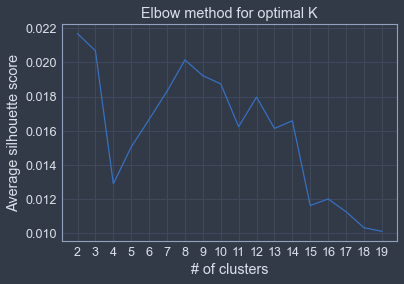

In [65]:
# Running the KMeans elbow plot
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,1), 'silhouette')

  0%|                                                                                                                                                                                      | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2090, 7428)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:08<00:00,  2.05it/s]


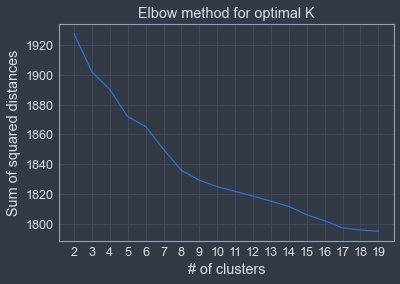

In [66]:
# Running the KMeans elbow plot
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,1), 'inertia')

#### It looks like optimal k for ngram_range (1,1) is about 8 

  0%|                                                                                                                                                                                      | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2090, 104577)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:14<00:00,  1.28it/s]


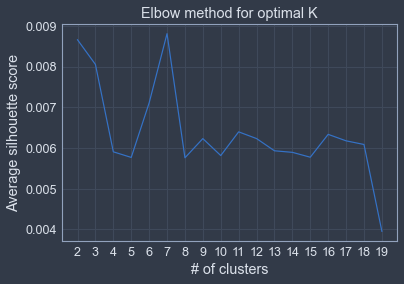

In [67]:
# Let's try ngram (1,2)
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,2), 'silhouette')

  0%|                                                                                                                                                                                      | 0/18 [00:00<?, ?it/s]

TF-IDF matrix shape:  (2090, 104577)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:13<00:00,  1.33it/s]


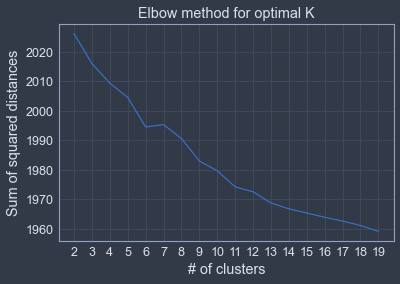

In [68]:
elbow_kmeans_ssd(climate_laws_texts, 2, 20, 1, (1,2), 'inertia')

#### The optimal K for ngram_range=(1, 2) is 6 or 7.

**Main data:** climate_laws_texts

In [69]:
# Creating dictionary linking climate_laws_texts with unique id in climate_laws_df
climate_ids_to_texts_dict = {key: value for (key, value) in zip(list(climate_laws_df["id"]), climate_laws_texts)}
assert isinstance(climate_ids_to_texts_dict, dict)

In [128]:
# Pipeline function
def tfidf_kmeans(data, k, ngram_range):
    """
    Pipeline function to run TF-IDF vectorization and KMeans clustering
    Returns 2 objects respectively: cluster_labels, cluster_centers
    """
    # Vectorization
    tfidf = TfidfVectorizer(analyzer='word',
                            tokenizer=dummy_func,
                            preprocessor=dummy_func,
                            token_pattern=None,
                            ngram_range=ngram_range
                            )
    tfidf_matrix = tfidf.fit_transform(data)
    # KMeans clustering
    kmeans_model = MiniBatchKMeans(n_clusters=k,
                                       init='k-means++',
                                       n_init=1,
                                       init_size=2090,
                                       batch_size=2090,
                                       verbose=0,
                                       max_iter=1000,
                                       random_state=0)
    kmeans_model = kmeans_model.fit(tfidf_matrix)
    cluster_labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_
    sorted_centroids = cluster_centers.argsort()[:, ::-1] # Returns the list of indices that goes from the largest item to the smallest
    terms = tfidf.get_feature_names()
    return cluster_labels, cluster_centers, sorted_centroids, terms

def compile_kmeans_top_words_df(num_clusters, sorted_centroids, terms, n_top_terms):
    all_keywords = {}
    for i in range(num_clusters):
        topic_keywords = []
        all_keywords[f"{i}"] = []
        for j in sorted_centroids[i, :n_top_terms]:
            topic_keywords.append(terms[j])
        all_keywords[f"{i}"].append(topic_keywords)
    keywords_df = pd.DataFrame({'Cluster': all_keywords.keys()})
    keywords_df['Cluster'] = keywords_df['Cluster'].apply(lambda x: str(x))
    keywords_df.loc[:, "Top Words"] = [" ".join(words) for keywords in all_keywords.values() for words in keywords]
    keywords_df.loc[:, "Top Words separated"] = [" | ".join(words) for keywords in all_keywords.values() for words in keywords]
    return keywords_df

In [129]:
# Baseline pipeline 1 - TF-IDF ngram (1, 1) and then KMeans Clustering @ k = 10
k8_n11_tfidf_labels, k8_n11_tfidf_cluster_centers, k8_n11_sorted_centroids, k8_n11_terms = tfidf_kmeans(climate_laws_texts, 8, (1,1)) 

In [130]:
k8_n11_keywords_df = compile_kmeans_top_words_df(8, k8_n11_sorted_centroids, k8_n11_terms, 20)
k8_n11_keywords_df

,Cluster,Top Words,Top Words separated
0,0,emission carbon gas greenhouse tax climate red...,emission | carbon | gas | greenhouse | tax | c...
1,1,energy renewable development source nuclear ru...,energy | renewable | development | source | nu...
2,2,climate change adaptation national plan strate...,climate | change | adaptation | national | pla...
3,3,disaster risk management national emergency re...,disaster | risk | management | national | emer...
4,4,energy efficiency renewable plan building use ...,energy | efficiency | renewable | plan | build...
5,5,electricity energy renewable tariff power gene...,electricity | energy | renewable | tariff | po...
6,6,development protection national sustainable cl...,development | protection | national | sustaina...
7,7,forest forestry red national deforestation sus...,forest | forestry | red | national | deforesta...


In [103]:
# Baseline pipeline 1 - TF-IDF ngram (1, 1) and then KMeans Clustering @ k = 10
k5_n11_tfidf_labels, k5_n11_tfidf_cluster_centers, k5_n11_sorted_centroids, k5_n11_terms = tfidf_kmeans(climate_laws_texts, 5, (1,1)) 

In [111]:
k5_n11_keywords_df = compile_kmeans_top_words_df(5, k5_n11_sorted_centroids, k5_n11_terms, 20)
for i, j in zip(k5_n11_keywords_df['Cluster'], k5_n11_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
disaster | management | forest | risk | national | plan | policy | emergency | development | response | sustainable | natural | prevention | government | red | climate | forestry | reduction | carbon | preparedness
Cluster 1:
energy | efficiency | building | plan | renewable | national | use | policy | consumption | efficient | sector | saving | target | supply | conservation | measure | emission | gas | programme | electricity
Cluster 2:
climate | change | adaptation | national | plan | strategy | policy | development | mitigation | sector | sustainable | management | impact | risk | agriculture | emission | resource | framework | document | government
Cluster 3:
energy | renewable | electricity | source | power | generation | development | tariff | solar | production | wind | project | use | national | grid | plant | sector | supply | market | regulation
Cluster 4:
emission | protection | regulation | tax | vehicle | energy | carbon | national | fuel | biofuels | climate |

##### Baseline model 2 with ngram_range=(1,2) 

In [113]:
# Baseline pipeline 2 - TF-IDF ngram (1, 2) and then KMeans Clustering @ k = 7
k7_n12_tfidf_labels, k7_n12_tfidf_cluster_centers, k7_n12_sorted_centroids, k7_n12_terms = tfidf_kmeans(climate_laws_texts, 7, (1,2))

In [115]:
k7_n12_keywords_df = compile_kmeans_top_words_df(7, k7_n12_sorted_centroids, k7_n12_terms, 20)
for i, j in zip(k7_n12_keywords_df['Cluster'], k7_n12_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
disaster | management | risk | disaster risk | disaster management | risk management | national | national disaster | emergency | plan | forest | response | prevention | natural | preparedness | natural disaster | government | policy | risk reduction | climate
Cluster 1:
protection | civil protection | civil | article | forest | national | disaster | national civil | biofuels | policy | provision | fund | state | public | use | response | prevention | carbon | glacier | project
Cluster 2:
electricity | tax | vehicle | energy | electric | power | regulation | tariff | solar | fuel | plant | generation | new | carbon | installation | market | incentive | car | emission | renewable
Cluster 3:
nuclear | nuclear energy | energy | agency | atomic | atomic energy | renewable | renewable energy | power | production | energy production | energy agency | requires | gas | electricity | nuclear power | government | facility | natural | natural gas
Cluster 4:
emission | development | nat

In [137]:
# Baseline pipeline 4 - TF-IDF ngram (1, 2) and then KMeans Clustering @ k = 10
k10_n12_tfidf_labels, k10_n12_tfidf_cluster_centers, k10_n12_sorted_centroids, k10_n12_terms = tfidf_kmeans(climate_laws_texts, 10, (1,2))

k10_n12_keywords_df = compile_kmeans_top_words_df(10, k10_n12_sorted_centroids, k10_n12_terms, 20)
for i, j in zip(k10_n12_keywords_df['Cluster'], k10_n12_keywords_df['Top Words separated']):
    print(f"Cluster {i}:")
    print(j)

Cluster 0:
forest | protection | carbon | management | national | red | sustainable | climate | forestry | development | land | policy | gas | emission | change | greenhouse | greenhouse gas | climate change | activity | conservation
Cluster 1:
energy | efficiency | energy efficiency | building | national energy | plan | renewable | use | national | consumption | renewable energy | policy | efficient | saving | sector | target | supply | measure | energy saving | conservation
Cluster 2:
renewable | energy | renewable energy | source | electricity | renewable source | energy source | incentive | tax | generation | project | biomass | energy renewable | development | production | use | grid | plant | rural | electricity renewable
Cluster 3:
disaster | disaster management | management | risk | emergency | national disaster | national | response | natural disaster | natural | prevention | plan | civil protection | civil | preparedness | disaster risk | government | disaster prevention | pr

#### There are basically 4 different models to evaluate --> Output to Excel file to examine them manually

In [133]:
def output_clustering_excel(output_name, cluster_labels, cluster_results_df, baseline_df = climate_laws_df):
    os.makedirs("./clustering_output", exist_ok=True)
    baseline_df = climate_laws_df
    baseline_df.loc[:, "Cluster"] = list(map(str, cluster_labels))
    results_df = baseline_df.merge(cluster_results_df, on="Cluster", how="left")
    results_df.to_excel(f"./clustering_output/{output_name}.xlsx", index=False)
    print("Baseline data has been merged with clustering results and exported to Excel")

In [134]:
# Outputting some Excel files to examine the output

# K8 N11
output_clustering_excel("k8_n11_kmeans_tfidf_output", k8_n11_tfidf_labels, k8_n11_keywords_df)

Baseline data has been merged with clustering results and exported to Excel


In [135]:
# K5 N11
output_clustering_excel("k5_n11_kmeans_tfidf_output", k5_n11_tfidf_labels, k5_n11_keywords_df)

Baseline data has been merged with clustering results and exported to Excel


##### Further domain expert's ideas:

- Another level of clustering for Forestry group

In [136]:
# K2 N12
output_clustering_excel("k7_n12_kmeans_tfidf_output", k7_n12_tfidf_labels, k7_n12_keywords_df)

Baseline data has been merged with clustering results and exported to Excel


# Section 2: Econometrics analysis

## First analysis - cross-sectional analysis of number of climate laws in different country

**Question**: What factors correlate with high number of climate laws in a country?

In [138]:
climate_laws_df.columns

Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id', 'tsv',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path',
       'country_name', 'percent_global_emissions', 'climate_risk_index',
       'wb_income_group', 'eu_member_ind', 'law_discarded_at', 'federal_ind',
       'legislative_process', 'clean_description', 'clean_legislative_process',
       'clean_title_plus_desc', 'Cluster'],
      dtype='object')

In [139]:
country_info_cols = ['percent_global_emissions', 'climate_risk_index', 'wb_income_group', 'eu_member_ind']

In [140]:
# Compile country data
climate_laws_country_df = pd.DataFrame(pd.pivot_table(values="id",
                                                      index="country_name",
                                                      aggfunc="count",
                                                      data=climate_laws_df.dropna(subset=country_info_cols)).to_records()
                                      )
climate_laws_country_df.rename(columns={'id':'num_climate_laws'}, inplace=True)
climate_laws_country_df.head()

,country_name,num_climate_laws
0,Afghanistan,14
1,Albania,3
2,Algeria,13
3,Angola,21
4,Antigua and Barbuda,5


In [141]:
def enrich_pivot(main_df=None, baseline_data=None, cols=None, index=None, values=None, aggfunc=None):
    """
    Enrich pivoted data with more columns
    """
    for col in cols:
        supplemental_df = pd.DataFrame(pd.pivot_table(values=col,
                                                      index=index,
                                                      aggfunc=aggfunc,
                                                      data=baseline_data
                                                     ).to_records()
                                      )
        main_df = main_df.merge(supplemental_df, on=index, how="left")
    return main_df

In [142]:
climate_laws_country_df = enrich_pivot(main_df=climate_laws_country_df, 
                                     baseline_data=climate_laws_df, 
                                     cols=['percent_global_emissions', 'climate_risk_index', 'wb_income_group', 'eu_member_ind'],
                                     index="country_name",
                                     values="id",
                                     aggfunc=lambda x: re.sub(r"([{}''])", "", str(set(x)))
                                     )

In [143]:
# Showing the shape and head of the cross-sectional data1
print(climate_laws_country_df.shape)
climate_laws_country_df.head()

(175, 6)


,country_name,num_climate_laws,percent_global_emissions,climate_risk_index,wb_income_group,eu_member_ind
0,Afghanistan,14,0.2,41.83,Low income,False
1,Albania,3,0.02,114.17,Upper middle income,False
2,Algeria,13,0.44,92.5,Upper middle income,False
3,Angola,21,0.38,97,Lower middle income,False
4,Antigua and Barbuda,5,0.0,58,High income,False


In [144]:
# Cleaning individual column
def clean_numeric_col(data):
    if data == "":
        return np.nan
    else:
        data = float(data)
        return data
    
# Percent global emissions
climate_laws_country_df["percent_global_emissions"] = climate_laws_country_df["percent_global_emissions"].apply(lambda x: clean_numeric_col(x))

# CLimate risk index
climate_laws_country_df["climate_risk_index"] = climate_laws_country_df["climate_risk_index"].apply(lambda x: clean_numeric_col(x))

In [145]:
# Showing mean of percent global emissions and climate risk index
print(f"Average global emissions of countries in dataset: {round(climate_laws_country_df.percent_global_emissions.mean(), 2)}")
print(f"Average global climate risk index of countries in dataset: {round(climate_laws_country_df.climate_risk_index.mean())}")

Average global emissions of countries in dataset: 0.57
Average global climate risk index of countries in dataset: 91


In [146]:
# Checking distinct values in wb_income_group
climate_laws_country_df["wb_income_group"].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', ''], dtype=object)

In [147]:
# See which country has the empty string
climate_laws_country_df[climate_laws_country_df["wb_income_group"]==""]

# This is a pretty empty observation, let's drop it
climate_laws_country_df.drop(index=53, axis=0, inplace=True)

In [148]:
# Getting dummies for wb_income_group
assert len(pd.get_dummies(climate_laws_country_df.wb_income_group)) == len(climate_laws_country_df) 

# Concatenating dummies cols into the main df
climate_laws_country_df = pd.concat(objs=[climate_laws_country_df, pd.get_dummies(climate_laws_country_df.wb_income_group)],
                                   axis=1)
try:
    del climate_laws_country_df["wb_income_group"]
except KeyError:
    pass

In [149]:
# Finally, cleaning the eu_member_ind
def clean_bool(data):
    if data=="True":
        return 1
    elif data=="False":
        return 0
    else:
        return np.nan
    
climate_laws_country_df["eu_member_ind"] = climate_laws_country_df["eu_member_ind"].apply(lambda x: clean_bool(x))

In [150]:
# Dropping any remaining NaNs
climate_laws_country_df.dropna(inplace=True)

In [151]:
# Final shape
print(climate_laws_country_df.shape)

climate_laws_country_df.head()

(174, 9)


,country_name,num_climate_laws,percent_global_emissions,climate_risk_index,eu_member_ind,High income,Low income,Lower middle income,Upper middle income
0,Afghanistan,14,0.20,41.83,0,0,1,0,0
1,Albania,3,0.02,114.17,0,0,0,0,1
2,Algeria,13,0.44,92.50,0,0,0,0,1
3,Angola,21,0.38,97.00,0,0,0,1,0
4,Antigua and Barbuda,5,0.00,58.00,0,1,0,0,0


**After data cleaning is done, let's run it through a simple OLS model to see the associations of different variables to the number of climate laws passed by a country** 

**Cross-sectional country data**

<code>**y** = Number of climate laws passed for a given country</code>

<code>**X**: percent_global_emissions, climate_risk_index, wb_income_group, eu_member_ind</code>

In [152]:
# Import statsmodels linear models
import statsmodels.api as sm

In [153]:
# Fitting OLS
country_X = climate_laws_country_df.iloc[:, 2:9]
country_y = climate_laws_country_df.num_climate_laws
country_ols = sm.OLS(country_y, country_X)
country_ols_results = country_ols.fit()

# Summary
country_ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       num_climate_laws   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.635
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           2.96e-07
Time:                        16:47:31   Log-Likelihood:                -580.35
No. Observations:                 174   AIC:                             1175.
Df Residuals:                     167   BIC:                             1197.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
percent_global_emissions     0.3332      0.247      1.347      0.180      -0.155       0.822
climate_risk_index          -0.0609      0.013     -4.571      0.000      -0.087      -0.035
eu_member_ind                3.4649      1.823      1.900      0.059      -0.135       7.064
High income                 17.5965      1.974      8.914      0.000      13.699      21.494
Low income                  13.9334      1.806      7.715      0.000      10.368      17.499
Lower middle income         16.8407      1.572     10.714      0.000      13.738      19.944
Upper middle income         14.6800      1.595      9.205      0.000      11.531      17.829
==============================================================================
Omnibus:                       33.582   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.075
Skew:                           1.026   Prob(JB):                     4.92e-12
Kurtosis:                       4.725   Cond. No.                         564.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# Exploring climate_risk_index
climate_laws_country_df.climate_risk_index.describe()

count    174.000000
mean      91.184770
std       41.223002
min       10.330000
25%       58.000000
50%       85.920000
75%      119.545000
max      173.670000
Name: climate_risk_index, dtype: float64

In [155]:
# OLS Results dictionary
ols_results_dict = dict(country_ols_results.params)

In [156]:
# Interpreting some of the results
_ = np.std(climate_laws_country_df.climate_risk_index)*ols_results_dict['climate_risk_index']
print(f"1 standard deviation increase in climate_risk_index is associated with {round(_, 2)} increase in number of climate laws passed by a country")
_ = ols_results_dict['High income']
print(f"Being a High income country (WB index) is associated with a {round(_, 2)} increase in number of climate_laws passed by a country")

1 standard deviation increase in climate_risk_index is associated with -2.5 increase in number of climate laws passed by a country
Being a High income country (WB index) is associated with a 17.6 increase in number of climate_laws passed by a country


## Further idea

Potentially build a **panel dataset** enriched with indicators from the WB development indicators.

Some important observations to note:

**1. Year range: 1947 to 2020 -> 73 years**

**2. Number of countries: 198 (197 if we omit the European Union, although there needs to be a way to incorporate their data into the panel as it is a significant dataset)**

### Idea: Use association rules to link different categories of climate laws with different categories of legislative processes 

In [157]:
climate_laws_df["date_passed"].astype(float).describe()

count    2090.000000
mean     2010.535407
std         7.344686
min      1947.000000
25%      2008.000000
50%      2012.000000
75%      2015.000000
max      2020.000000
Name: date_passed, dtype: float64

In [158]:
climate_laws_df["country_name"].nunique()

198